# Задачи
1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)


2. Выясните, какой пользователь купил больше всего товаров.


3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?


4. Визуализируйте продажи по дням.


5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

# 1

In [1]:
import os

In [2]:
# посмотрим на наши папки
os.listdir()

['.ipynb_checkpoints',
 '3_taxi_peru.csv',
 '4_lesson.ipynb',
 '4_minprj.ipynb',
 'data']

In [3]:
os.listdir('data')

['.ipynb_checkpoints',
 '2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [4]:
# Это будет началом пути
start_path = 'data/'

In [5]:
import pandas as pd
df = pd.DataFrame()

for i in os.listdir('data'):
    
    # Пропускаем папку '.ipynb_checkpoints'
    if i == ".ipynb_checkpoints":
        continue
    else:
        
        name_folder_date = i
        for name_person in os.listdir(f'data/{name_folder_date}'):
            
            if name_person == ".ipynb_checkpoints":
                continue
            else:
            
                df_t = pd.read_csv(f'data/{name_folder_date}/{name_person}/data.csv')
                df_t['name'] = name_person
                df_t['date'] = name_folder_date
            
                df = pd.concat([df, df_t], ignore_index=True)

In [6]:
df

,Unnamed: 0,product_id,quantity,name,date
0,0,47,1,Alexey_Smirnov,2020-12-03
1,1,57,1,Alexey_Smirnov,2020-12-03
2,2,14,2,Alexey_Smirnov,2020-12-03
3,3,52,1,Alexey_Smirnov,2020-12-03
4,4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...,...
156,1,66,4,Rostislav_Petrov,2020-12-09
157,2,39,2,Rostislav_Petrov,2020-12-09
158,0,82,4,Vasiliy_Ivanov,2020-12-09
159,1,74,2,Vasiliy_Ivanov,2020-12-09


In [7]:
df = df.drop('Unnamed: 0', axis=1)
df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


# 2

In [8]:
df.groupby('name').agg({'quantity':'sum'}).sort_values('quantity', ascending=False).head(3)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45


# 3

In [9]:
top_10 = df.groupby('product_id', as_index=False) \
           .agg({'quantity':'sum'}) \
           .sort_values('quantity', ascending=False) \
           .head(10)
top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<Axes: xlabel='product_id', ylabel='quantity'>

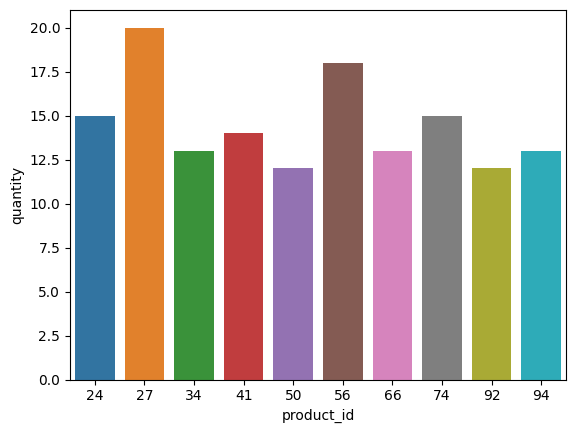

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top_10.product_id, y=top_10.quantity)

# 4

<Axes: xlabel='date', ylabel='quantity'>

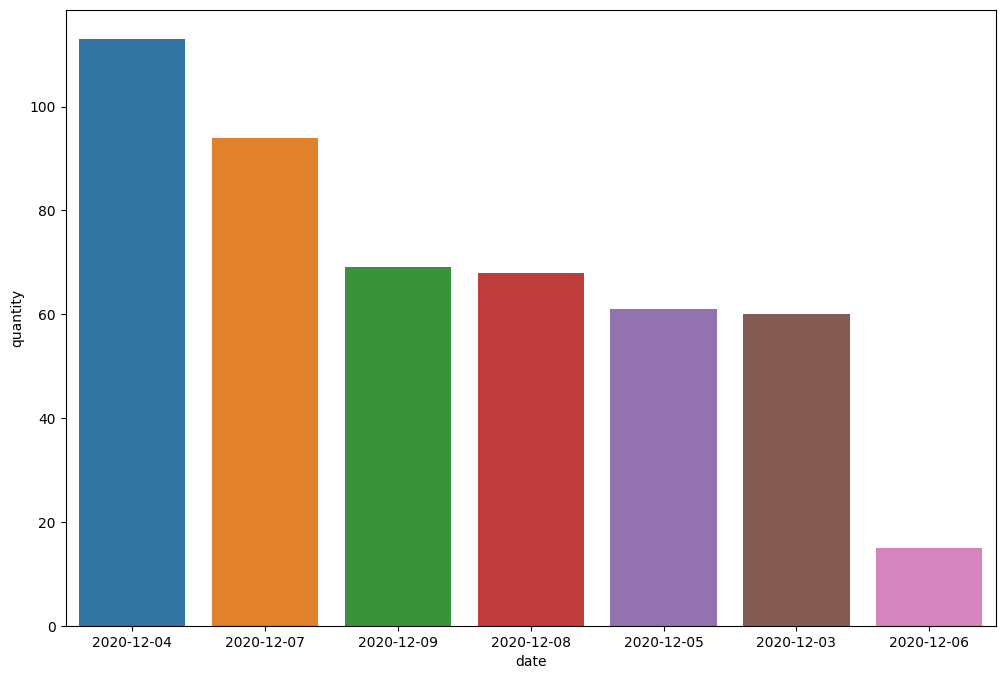

In [11]:
quantity_date = df.groupby('date', as_index=False) \
                  .agg({'quantity':'sum'}) \
                  .sort_values('quantity', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=quantity_date.date, y=quantity_date.quantity)

# 5

5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [13]:
df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [40]:
# Посчитаем количества покупок каждого товара по датам и именам
# Посчитаем сколько для каждого имени и продукта было различных дат (покупок в разные дни)

df_ = df.groupby(['product_id', 'name', 'date'], as_index=False).agg({'quantity':'count'})
df_ = df_.groupby(['name', 'product_id'], as_index=False).agg({'date':'count'})
df_.query('date != 1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


In [41]:
# Ответ: 2